Chapter 21
# 单位球面上的瑞利商等高线
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import os
# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

In [4]:
# 设置步数
intervals = 50
ntheta = intervals
nphi = 2*intervals

# 单位球，球坐标
# theta取值范围为 [0, pi]
theta = np.linspace(0, np.pi*1, ntheta+1)
# phi取值范围为 [0, 2*pi]
phi   = np.linspace(0, np.pi*2, nphi+1)

# 单位球半径
r = 1 

# 球坐标转化为三维直角坐标 
# z轴坐标网格数据
Z = np.outer(r*np.cos(theta), np.ones(nphi+1))

# x轴坐标网格数据
X = np.outer(r*np.sin(theta), np.cos(phi))

# y轴坐标网格数据
Y = np.outer(r*np.sin(theta), np.sin(phi))

pp_,tt_ = np.meshgrid(phi,theta)

In [3]:
# 每一行代表一个三维直角坐标系坐标点
# 所有坐标点都在单位球面上
Points = np.column_stack([X.ravel(), Y.ravel(), Z.ravel()])

# 定义矩阵Q
Q = np.array([[1, 0.5, 1],
              [0.5, 2, -0.2],
              [1, -0.2, 1]])
Rayleigh_Q = np.diag(Points @ Q @ Points.T)
Rayleigh_Q_ = np.reshape(Rayleigh_Q,X.shape)

(0.0, 6.283185307179586, 0.0, 3.141592653589793)

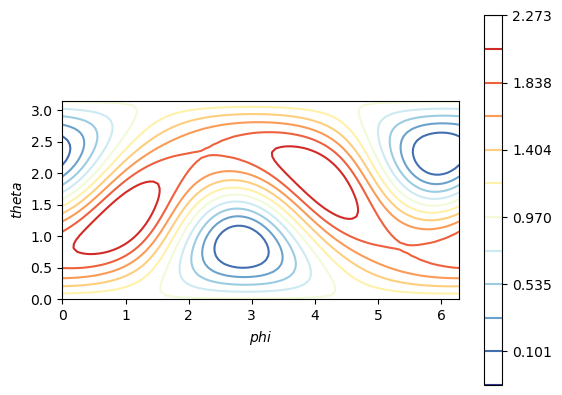

In [5]:
fig, ax = plt.subplots()
levels = np.linspace(Rayleigh_Q_.min(),Rayleigh_Q_.max(),12)

colorbar = ax.contour(pp_,tt_, Rayleigh_Q_, levels = levels, cmap='RdYlBu_r')
# ax.contour(xx1, xx2, df_dx1_zz, levels = [0],
#            colors = 'k')
# 黑色线代表偏导为 0

fig.colorbar(colorbar, ax=ax)
ax.set_xlim(tt_.min(), tt_.max())
ax.set_ylim(pp_.min(), pp_.max())
# ax.set_xticks([])
# ax.set_yticks([])
ax.set_xlabel('$phi$')
ax.set_ylabel('$theta$')
plt.axis('scaled')
# fig.savefig('Figures/对x1偏导.svg', format='svg')

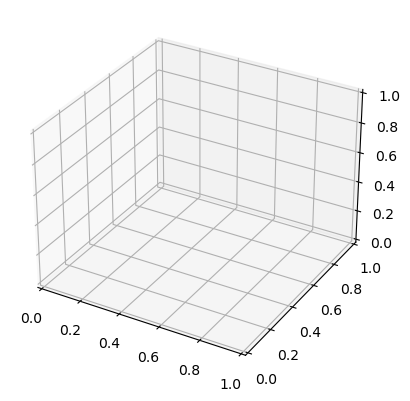

In [6]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

all_contours = ax.contour(pp_,tt_, Rayleigh_Q_, levels = levels, cmap='RdYlBu_r')
# 提取等高线
ax.cla()  
# 擦去等高线这个“艺术家”

from matplotlib.colors import Normalize
norm = Normalize(vmin=all_contours.levels.min(), 
                                   vmax=all_contours.levels.max(), 
                                   clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.RdYlBu_r)

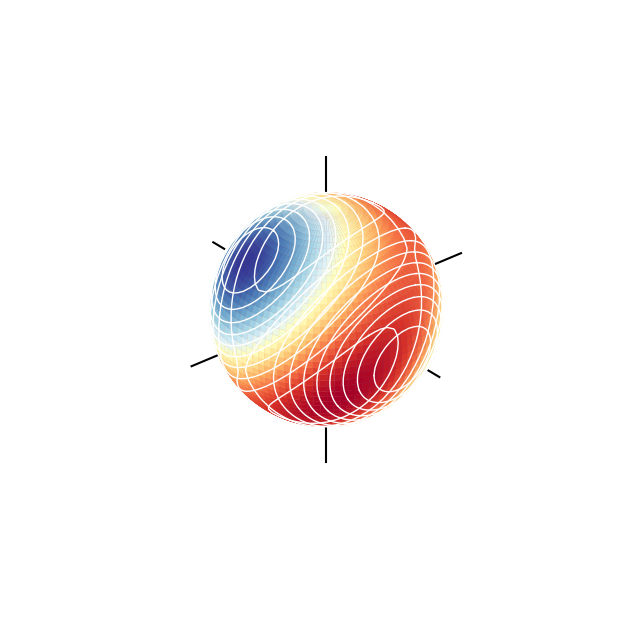

In [10]:
norm_plt = plt.Normalize(Rayleigh_Q_.min(), Rayleigh_Q_.max())
colors = cm.RdYlBu_r(norm_plt(Rayleigh_Q_))

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=colors,
               linewidth=0.25, shade=False)

# surf.set_facecolor((0,0,0,0))

for level_idx, ctr_idx in zip(all_contours.levels,
                              all_contours.allsegs):
    
    for i in range(0,len(ctr_idx)):

        phi_i,theta_i = ctr_idx[i][:,0],ctr_idx[i][:,1]

        # 单位球半径
        r = 1 

        # 球坐标转化为三维直角坐标 
        # z轴坐标网格数据
        Z_i = r*np.cos(theta_i)

        # x轴坐标网格数据
        X_i = r*np.sin(theta_i)*np.cos(phi_i)

        # y轴坐标网格数据
        Y_i = r*np.sin(theta_i)*np.sin(phi_i)

        # 绘制映射结果
        ax.plot(X_i, Y_i, Z_i,
                color = 'w',
                linewidth = 1,zorder = 1e10)    

ax.set_proj_type('ortho')
# 另外一种设定正交投影的方式

ax.set_xlabel('$\it{x_1}$')
ax.set_ylabel('$\it{x_2}$')
ax.set_zlabel('$\it{x_3}$')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
k = 1.5
# three reference lines
ax.plot((-k, k), (0, 0), (0, 0), 'k')
ax.plot((0, 0), (-k, k), (0, 0), 'k')
ax.plot((0, 0), (0, 0), (-k, k), 'k')
ax.axis('off')
ax.set_xlim((-k, k))
ax.set_ylim((-k, k))
ax.set_zlim((-k, k))
ax.set_box_aspect([1,1,1])
ax.view_init(azim=-130, elev=30)
ax.grid(False)
fig.savefig('瑞利商，球面颜色映射 + 单色等高线.svg', format='svg')

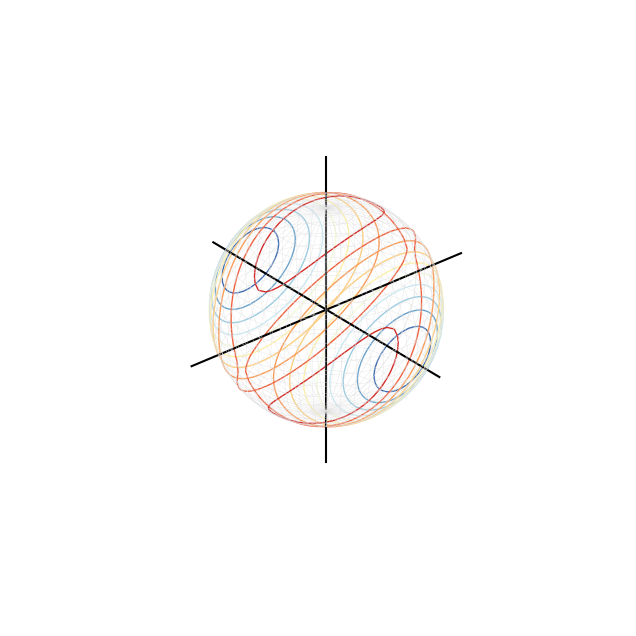

In [11]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_wireframe(X, Y, Z, rstride=2, cstride=2,
                         color = '0.88',linewidth=0.25)
surf.set_facecolor((0,0,0,0))

for level_idx, ctr_idx in zip(all_contours.levels,
                              all_contours.allsegs):
    
    for i in range(0,len(ctr_idx)):

        phi_i,theta_i = ctr_idx[i][:,0],ctr_idx[i][:,1]

        # 单位球半径
        r = 1 

        # 球坐标转化为三维直角坐标 
        # z轴坐标网格数据
        Z_i = r*np.cos(theta_i)

        # x轴坐标网格数据
        X_i = r*np.sin(theta_i)*np.cos(phi_i)

        # y轴坐标网格数据
        Y_i = r*np.sin(theta_i)*np.sin(phi_i)

        # 绘制映射结果
        ax.plot(X_i, Y_i, Z_i,
                color = mapper.to_rgba(level_idx),
                linewidth = 1)    

ax.set_proj_type('ortho')
# 另外一种设定正交投影的方式

ax.set_xlabel('$\it{x_1}$')
ax.set_ylabel('$\it{x_2}$')
ax.set_zlabel('$\it{x_3}$')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
k = 1.5
# three reference lines
ax.plot((-k, k), (0, 0), (0, 0), 'k')
ax.plot((0, 0), (-k, k), (0, 0), 'k')
ax.plot((0, 0), (0, 0), (-k, k), 'k')
ax.axis('off')
ax.set_xlim((-k, k))
ax.set_ylim((-k, k))
ax.set_zlim((-k, k))
ax.set_box_aspect([1,1,1])
ax.view_init(azim=-130, elev=30)
ax.grid(False)
fig.savefig('瑞利商，球面颜色映射 + 彩色等高线.svg', format='svg')

array([[2.82743339, 0.81681409]])